<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-582381-1696619487/blob/main/AS5_21BMH1191.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DENESH L - 21BMH1191**
***( denesh.l2021@vitstudent.ac.in )***

*Task1- Understand the Data*

In [ ]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.corr()

<ipython-input-56-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual_Income,Spending_Score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual_Income,0.977548,-0.012398,1.000000,0.009903
Spending_Score,0.013835,-0.327227,0.009903,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


*Task2- Data Preprocessing*

In [ ]:
df.isnull().any()

CustomerID        False
Gender            False
Age               False
Annual_Income     False
Spending_Score    False
dtype: bool

In [ ]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.nunique()


CustomerID        200
Gender              2
Age                51
Annual_Income      64
Spending_Score     84
dtype: int64

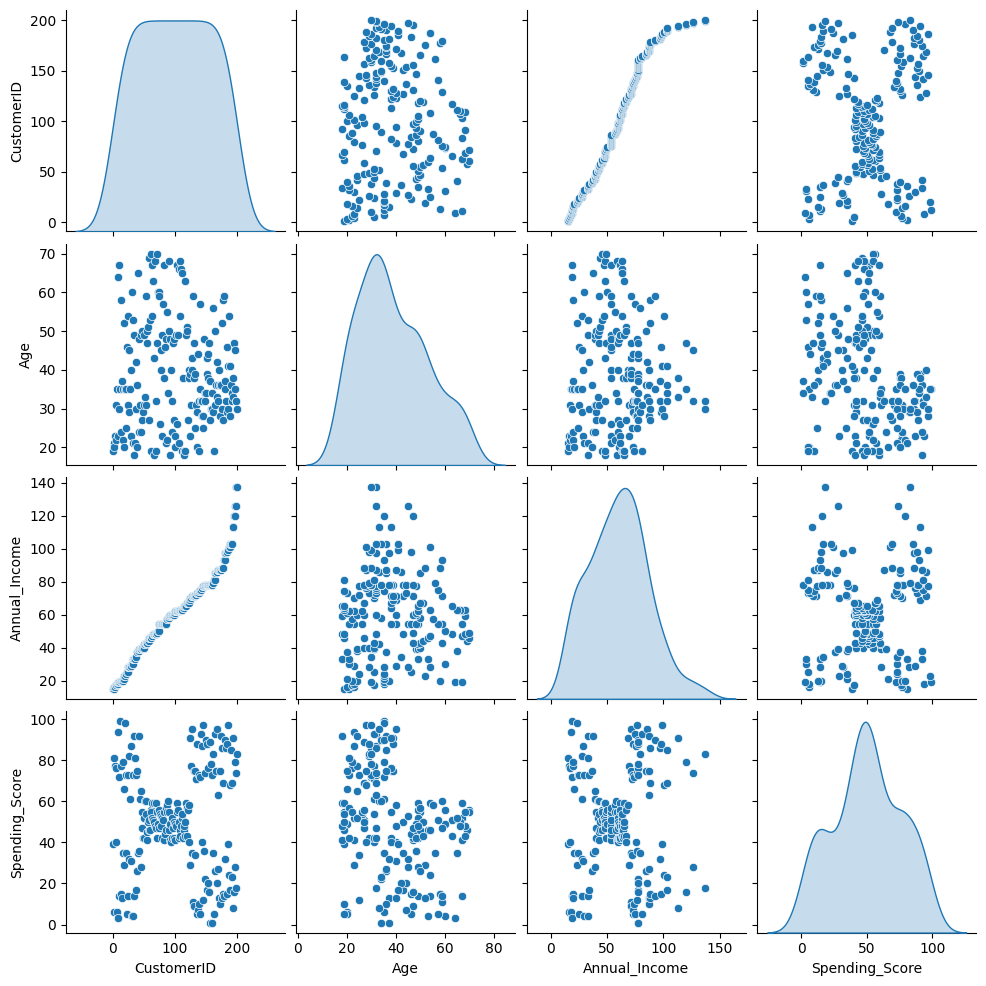

In [ ]:
#Visualizing Data Distributions
sns.pairplot(df, diag_kind='kde')
plt.show()

In [ ]:
df.median()

<ipython-input-63-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


CustomerID        100.5
Age                36.0
Annual_Income      61.5
Spending_Score     50.0
dtype: float64

Text(0.5, 1.0, 'Box Plot of All Columns')

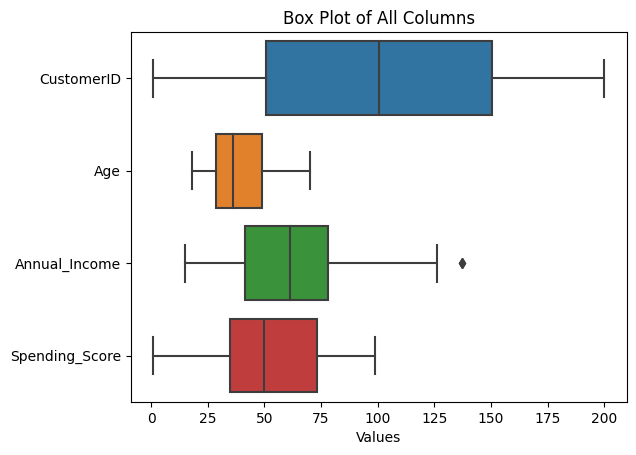

In [ ]:
sns.boxplot(data=df, orient='h')

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

In [ ]:
l1=["CustomerID","Age","Annual_Income","Spending_Score"]
for i in l1:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upperL=q3+1.5*iqr
    lowerL=q1-1.5*iqr
    df[i]=np.where(df[i]>upperL,upperL,np.where(df[i]<lowerL,lowerL,df[i]))

Text(0.5, 1.0, 'Box Plot of All Columns')

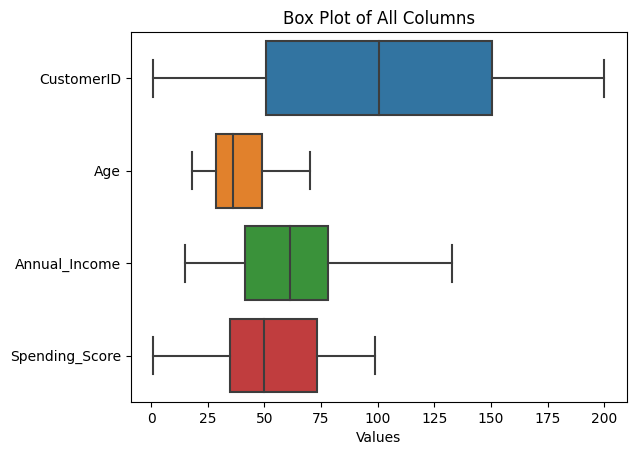

In [ ]:
sns.boxplot(data=df, orient='h')

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

<ipython-input-67-1a5faf6ca758>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot =True)


<Axes: >

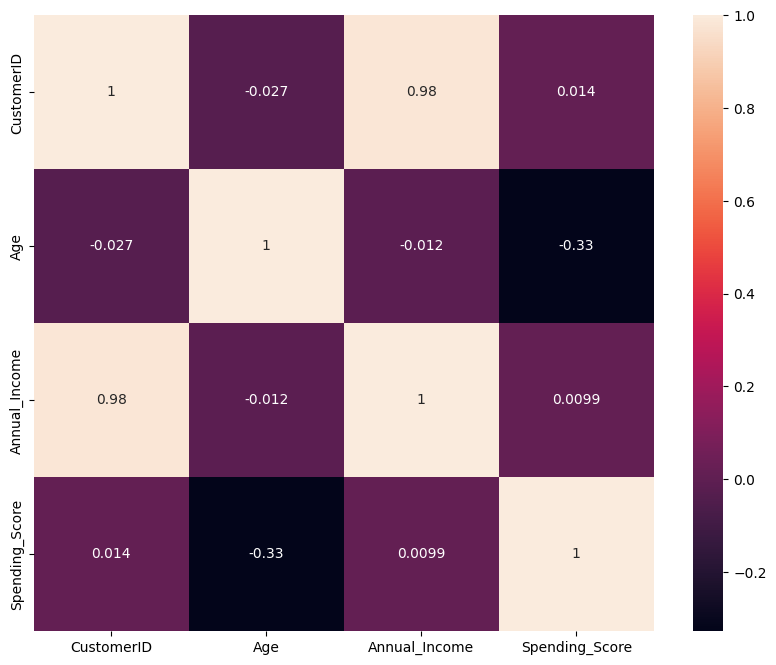

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot =True)

In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

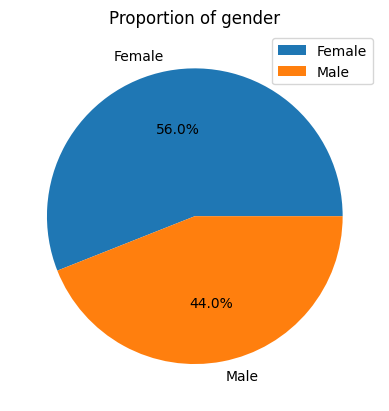

In [ ]:
plt.pie(df['Gender'].value_counts(),labels = ["Female","Male"],autopct ="%.01f%%")
plt.legend(["Female","Male"])
plt.title('Proportion of gender')
plt.show()

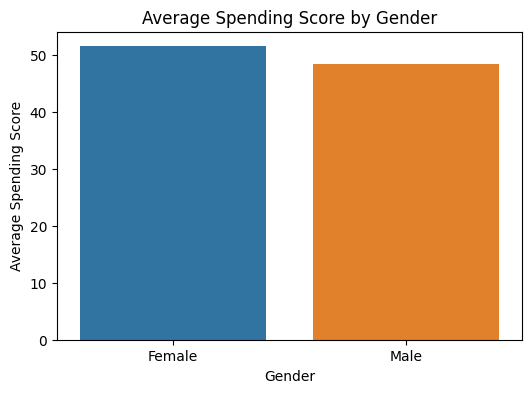

In [ ]:
# Calculate the mean spending score for each gender
mean_scores = df.groupby('Gender')['Spending_Score'].mean()


plt.figure(figsize=(6, 4))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Gender')
plt.show()

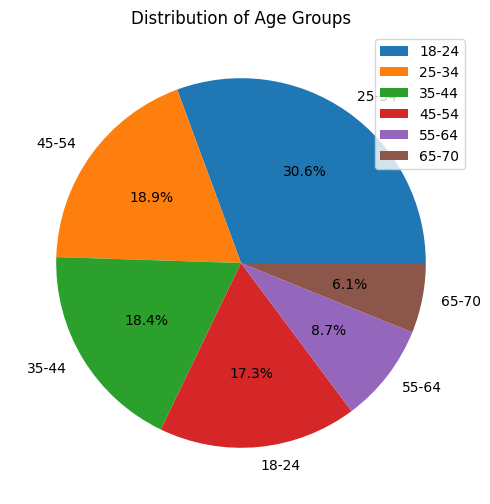

In [ ]:
#Spending score by age
#create age groups
bin_edges = [18, 25, 35, 45, 55, 65, 70]
df['Age_Group'] = pd.cut(df['Age'], bins=bin_edges, labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.figure(figsize=(8, 6))
plt.pie(df['Age_Group'].value_counts(), labels=df['Age_Group'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Age Groups')
plt.legend(['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.show()

In [ ]:
data = df.drop(['CustomerID'], axis=1)

In [ ]:
#define category features
data_cat = data.select_dtypes(include=['object'])

# Calculate and display the number of unique values for each 'object' column
for column in data_cat.columns:
    unique_count = data_cat[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'Gender' has 2 unique values.


In [ ]:
# encode variables with ordinal encoding
!pip install --upgrade category_encoders
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=data_cat)
data = encoder.fit_transform(data)
data

,Gender,Age,Annual_Income,Spending_Score,Age_Group
0,1,19.0,15.00,39.0,18-24
1,1,21.0,15.00,81.0,18-24
2,2,20.0,16.00,6.0,18-24
3,2,23.0,16.00,77.0,18-24
4,2,31.0,17.00,40.0,25-34
...,...,...,...,...,...
195,2,35.0,120.00,79.0,25-34
196,2,45.0,126.00,28.0,35-44
197,1,32.0,126.00,74.0,25-34
198,1,32.0,132.75,18.0,25-34


*Task3-Machine Learning with clustering algorithm*

In [ ]:
sse = []
for i in range(1, 10):
    km = KMeans(n_clusters =  i)
    km.fit(df[['Annual_Income', 'Spending_Score']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
sse

[268717.5637499999,
 180456.95393668828,
 105529.63651521516,
 72861.0524925923,
 43639.878158556414,
 36640.07754250581,
 29815.329366376376,
 24606.504466638442,
 21488.064203331895]

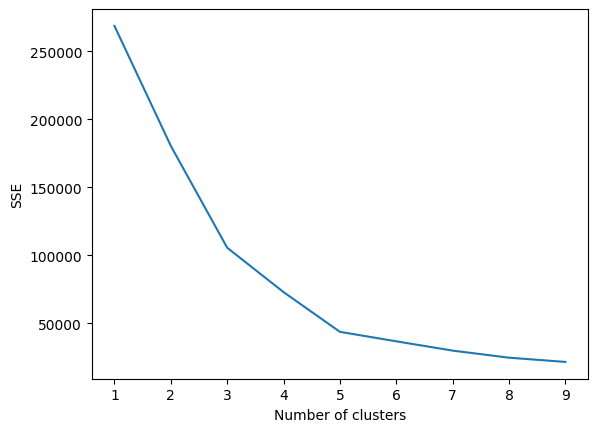

In [ ]:
plt.xlabel('Number of clusters')
plt.ylabel("SSE")
plt.plot(range(1,10), sse)

In [ ]:
km = KMeans(n_clusters = 5)
predicted = km.fit_predict(df[['Annual_Income', 'Spending_Score']])
predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [ ]:
df['Cluster'] = predicted
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Age_Group,Cluster
0,1.0,Male,19.0,15.00,39.0,18-24,1
1,2.0,Male,21.0,15.00,81.0,18-24,4
2,3.0,Female,20.0,16.00,6.0,18-24,1
3,4.0,Female,23.0,16.00,77.0,18-24,4
4,5.0,Female,31.0,17.00,40.0,25-34,1
...,...,...,...,...,...,...,...
195,196.0,Female,35.0,120.00,79.0,25-34,3
196,197.0,Female,45.0,126.00,28.0,35-44,2
197,198.0,Male,32.0,126.00,74.0,25-34,3
198,199.0,Male,32.0,132.75,18.0,25-34,2


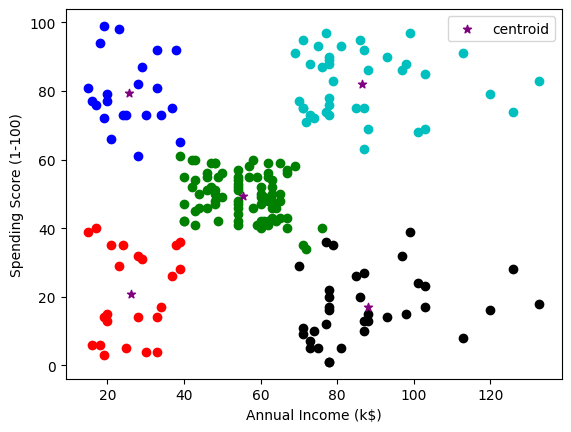

In [ ]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]
df5 = df[df.Cluster==4]
plt.scatter(df1['Annual_Income'],df1['Spending_Score'],color='green')
plt.scatter(df2['Annual_Income'],df2['Spending_Score'],color='red')
plt.scatter(df3['Annual_Income'],df3['Spending_Score'],color='black')
plt.scatter(df4['Annual_Income'],df4['Spending_Score'],color='c')
plt.scatter(df5['Annual_Income'],df5['Spending_Score'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()